<a href="https://colab.research.google.com/github/Dishantkharkar/Handwritten-Digit-Classification-using-ANN/blob/main/Handwritten_Digit_Classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

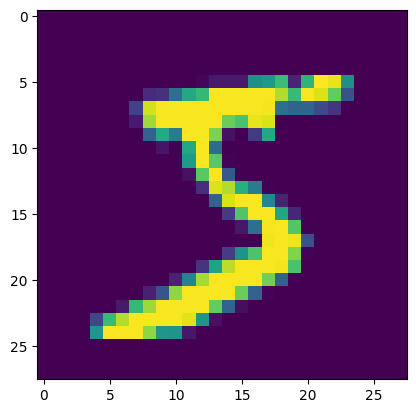

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

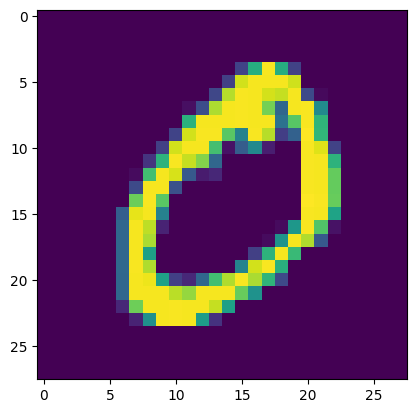

In [7]:
plt.imshow(X_train[1])

* The MNIST dataset consists of grayscale images of handwritten digits (0 through 9) with a resolution of 28x28 pixels. The pixel values in these images range from 0 to 255, where 0 represents black and 255 represents white

* The specific value of 255 is chosen because it is the maximum pixel value in the grayscale images. Therefore, dividing each pixel value by 255 scales them to the range [0, 1].

Here's a breakdown of the rationale behind normalizing by 255:

- Original Range: [0, 255]
- Normalized Range: [0, 1]

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model= Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 5ms/step - loss: 0.2845 - accuracy: 0.9170 - val_loss: 0.1430 - val_accuracy: 0.9578
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1163 - accuracy: 0.9651 - val_loss: 0.1220 - val_accuracy: 0.9629
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0804 - accuracy: 0.9757 - val_loss: 0.1041 - val_accuracy: 0.9703
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.1025 - val_accuracy: 0.9695
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.1068 - val_accuracy: 0.9703
Epoch 6/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.0937 - val_accuracy: 0.9737
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0905 - val_accuracy

In [15]:
y_prob = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [16]:
y_pred = y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9763

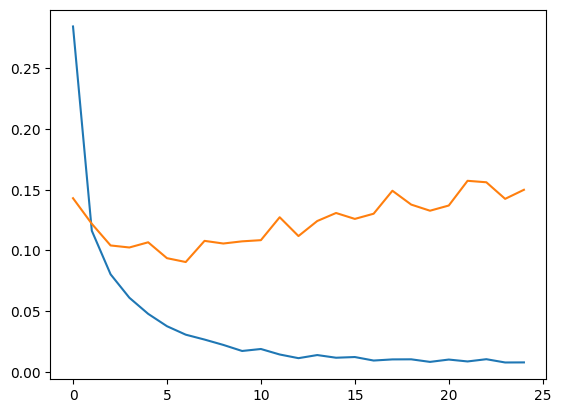

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

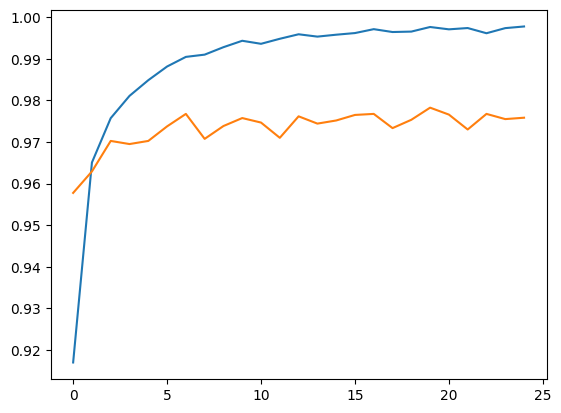

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

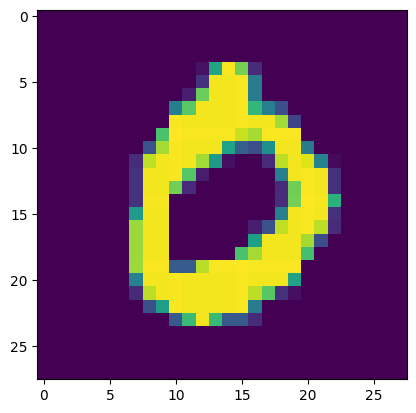

In [20]:
plt.imshow(X_test[3])

In [22]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 32ms/step


array([0])